# Importing Neccessary Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import BatchNormalization,Dropout,Dense,Flatten,Conv1D
from tensorflow.keras.optimizers import Adam

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Gathering the data and assessing the data

In [196]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('./creditcard.csv')

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [199]:
df.shape

(284807, 31)

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [201]:
df.Class.unique()

array([0, 1])

# Uneven class distribution

In [202]:
df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [203]:
nf = df[df.Class==0]
f = df[df.Class==1]

# Extracting random entries of class-0
# Total entries are 1.5* NO. of class-1 entries

In [204]:
nf = nf.sample(738)

# Creating new dataframe

In [205]:
data = pd.concat([f, nf], ignore_index=True)

In [206]:
data.shape

(1230, 31)

In [207]:
X = data.drop(['Class'],axis=1)
y=data['Class']

# Train-Test Split

In [208]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y)

In [209]:
X_train.shape,X_test.shape

((984, 30), (246, 30))

# Applying StandardScaler to obtain all the features in similar range

In [210]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [211]:
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

# Reshaping the input to 3D.

In [212]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

# CNN model

In [213]:
model=Sequential()
model.add(Conv1D(32,2,activation='relu',input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64,2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [214]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 29, 32)            96        
                                                                 
 batch_normalization_6 (Bat  (None, 29, 32)            128       
 chNormalization)                                                
                                                                 
 dropout_9 (Dropout)         (None, 29, 32)            0         
                                                                 
 conv1d_7 (Conv1D)           (None, 28, 64)            4160      
                                                                 
 batch_normalization_7 (Bat  (None, 28, 64)            256       
 chNormalization)                                                
                                                                 
 dropout_10 (Dropout)        (None, 28, 64)           

# Compiling and Fiting

In [215]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [216]:
history = model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test))

Epoch 1/20
31/31 [==============================] - 4s 25ms/step - loss: 0.6087 - accuracy: 0.7266 - val_loss: 0.5515 - val_accuracy: 0.8699
Epoch 2/20
31/31 [==============================] - 0s 15ms/step - loss: 0.3256 - accuracy: 0.8801 - val_loss: 0.4921 - val_accuracy: 0.8252
Epoch 3/20
31/31 [==============================] - 1s 17ms/step - loss: 0.2887 - accuracy: 0.9035 - val_loss: 0.4578 - val_accuracy: 0.8293
Epoch 4/20
31/31 [==============================] - 0s 9ms/step - loss: 0.2699 - accuracy: 0.9136 - val_loss: 0.4189 - val_accuracy: 0.8374
Epoch 5/20
31/31 [==============================] - 0s 8ms/step - loss: 0.2355 - accuracy: 0.9217 - val_loss: 0.3822 - val_accuracy: 0.8577
Epoch 6/20
31/31 [==============================] - 0s 8ms/step - loss: 0.2353 - accuracy: 0.9238 - val_loss: 0.3426 - val_accuracy: 0.8780
Epoch 7/20
31/31 [==============================] - 0s 8ms/step - loss: 0.2017 - accuracy: 0.9329 - val_loss: 0.3028 - val_accuracy: 0.9187
Epoch 8/20
31/31 

In [217]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

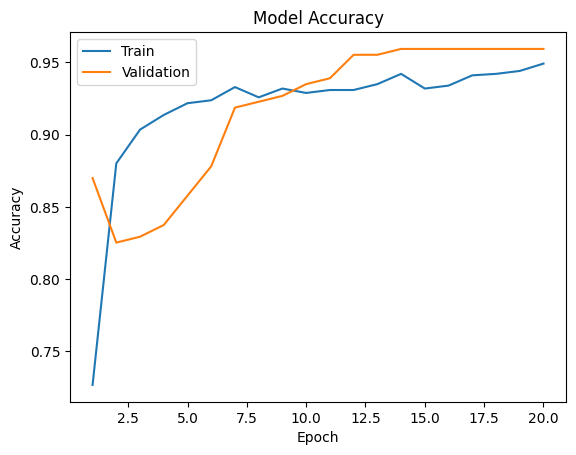

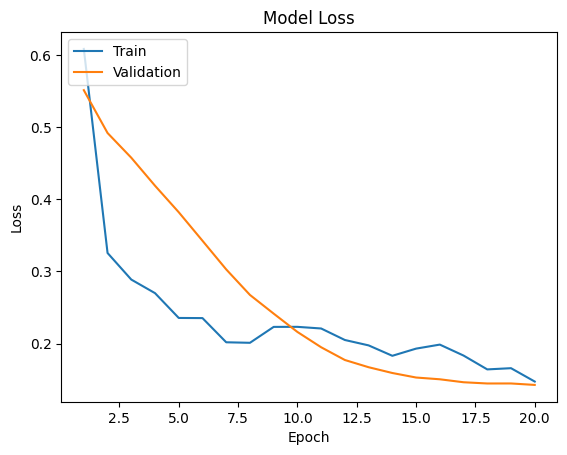

In [218]:
plotLearningCurve(history,20)

In [219]:
import numpy as np

def count_predictions_above_threshold(model, X_test, threshold):
    predictions = model.predict(X_test).flatten()
    count_above_threshold = np.sum(predictions < threshold)
    #count_above_threshold = np.sum((predictions > 0.3) & (predictions < 0.90))
    return count_above_threshold

# Assuming model, X_test are defined and initialized elsewhere:
threshold = 0.5
count = count_predictions_above_threshold(model, X_test, threshold)
print(f"Total predictions greater than {threshold}: {count}")


8/8 [==============================] - 0s 3ms/step
Total predictions greater than 0.5: 158


8/8 [==============================] - 0s 2ms/step
Initial Accuracy: 0.04
Initial Recall: 0.1
Initial Precision: 0.06
Enter the correct label for index 0 (0 for non-fraud, 1 for fraud): 1
Enter the correct label for index 1 (0 for non-fraud, 1 for fraud): 1
Enter the correct label for index 2 (0 for non-fraud, 1 for fraud): 1
Enter the correct label for index 3 (0 for non-fraud, 1 for fraud): 1
Enter the correct label for index 4 (0 for non-fraud, 1 for fraud): 1
Enter the correct label for index 7 (0 for non-fraud, 1 for fraud): 1
Enter the correct label for index 8 (0 for non-fraud, 1 for fraud): 1
Enter the correct label for index 9 (0 for non-fraud, 1 for fraud): 1
Enter the correct label for index 10 (0 for non-fraud, 1 for fraud): 1
Enter the correct label for index 12 (0 for non-fraud, 1 for fraud): 1
Enter the correct label for index 13 (0 for non-fraud, 1 for fraud): 1
Enter the correct label for index 14 (0 for non-fraud, 1 for fraud): 1
Enter the correct label for index 16 (

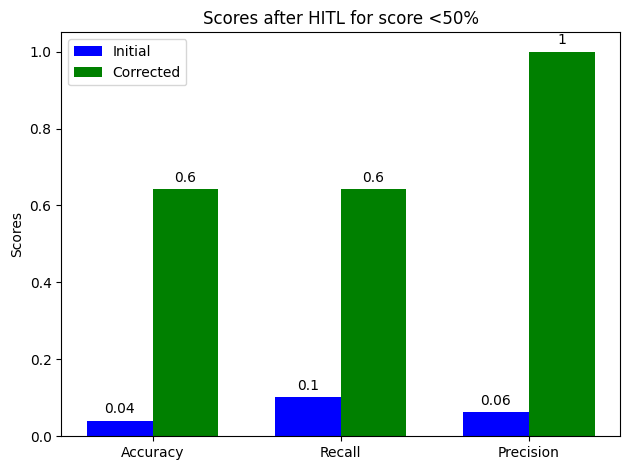

In [220]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score

def human_review_and_plot(model, X_test, y_test):
    predictions = model.predict(X_test).flatten()
    corrected_labels = y_test.copy()

    # Record initial accuracy, recall and precision
    initial_accuracy = accuracy_score(y_test, predictions < 0.5)
    print("Initial Accuracy:", "{:.1g}".format(initial_accuracy))

    initial_recall = recall_score(y_test, predictions < 0.5)
    print("Initial Recall:", "{:.1g}".format(initial_recall))

    initial_precision = precision_score(y_test, predictions < 0.5)
    print("Initial Precision:", "{:.1g}".format(initial_precision))

    # Loop over uncertain cases for human review
    for index in np.where(predictions < 0.5)[0]:
        human_label = int(input(f"Enter the correct label for index {index} (0 for non-fraud, 1 for fraud): "))
        corrected_labels[index] = human_label

    # Evaluate corrected accuracy, recall and precision
    corrected_accuracy = accuracy_score(corrected_labels, predictions < 0.5)
    print("Corrected Accuracy:", "{:.1g}".format(corrected_accuracy))

    corrected_recall = recall_score(corrected_labels, predictions < 0.5)
    print("Corrected Recall:", "{:.1g}".format(corrected_recall))

    corrected_precision = precision_score(corrected_labels, predictions < 0.5)
    print("Corrected Precision:", "{:.1g}".format(corrected_precision))

    # Plotting the metrics
    metrics = ['Accuracy', 'Recall', 'Precision']
    initial_values = [initial_accuracy, initial_recall, initial_precision]
    corrected_values = [corrected_accuracy, corrected_recall, corrected_precision]

    x = np.arange(len(metrics))
    width = 0.35

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, initial_values, width, label='Initial', color='blue')
    rects2 = ax.bar(x + width/2, corrected_values, width, label='Corrected', color='green')

    ax.set_ylabel('Scores')
    ax.set_title('Scores after HITL for score <50%')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics)
    ax.legend()
1
    ax.bar_label(rects1, padding=3, fmt='%.1g')
    ax.bar_label(rects2, padding=3, fmt='%.1g')

    fig.tight_layout()
    plt.show()

    return initial_accuracy, corrected_accuracy, initial_recall, corrected_recall, initial_precision, corrected_precision

results = human_review_and_plot(model, X_test, y_test)
